In [26]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud
from collections import Counter

In [14]:
# Load the dataset
file_path = "/content/emails.csv"
data = pd.read_csv(file_path)

In [15]:
# Inspect the dataset
print("Dataset Info:")
print(data.info())
print("Sample Data:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB
None
Sample Data:
                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1


In [7]:
# Rename columns for simplicity
data.columns = ['text', 'spam']

# Check for null values
print("\nNull values:")
print(data.isnull().sum())


Null values:
text    0
spam    0
dtype: int64


In [16]:
# Convert spam column to binary format (0 for not spam, 1 for spam)
data['spam'] = data['spam'].apply(lambda x: 1 if x == 1 else 0)

In [17]:
# Text Preprocessing Function
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply preprocessing to the text column
data['cleaned_text'] = data['text'].apply(preprocess_text)

In [18]:
# Check class distribution
print("\nClass Distribution:")
print(data['spam'].value_counts())


Class Distribution:
spam
0    4360
1    1368
Name: count, dtype: int64


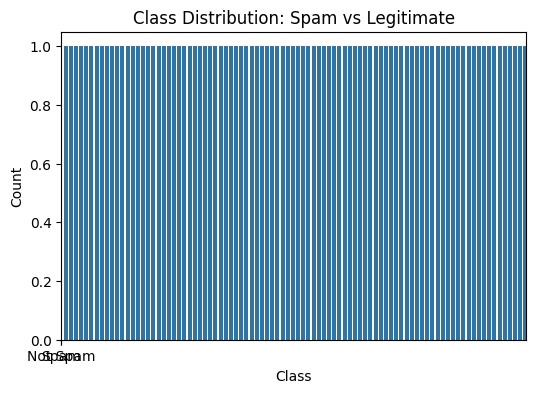

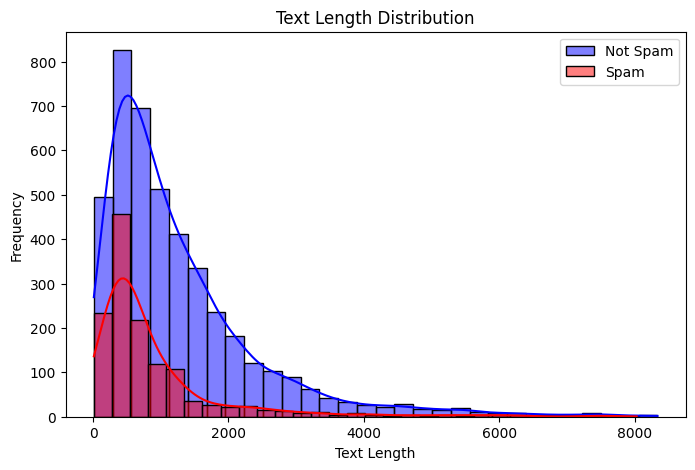

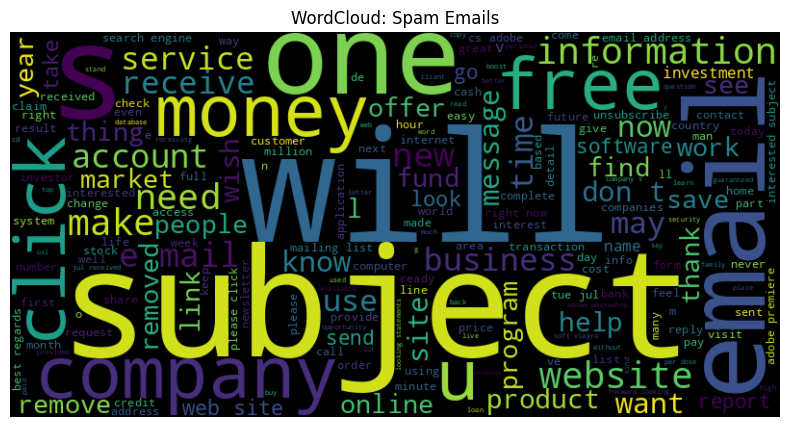

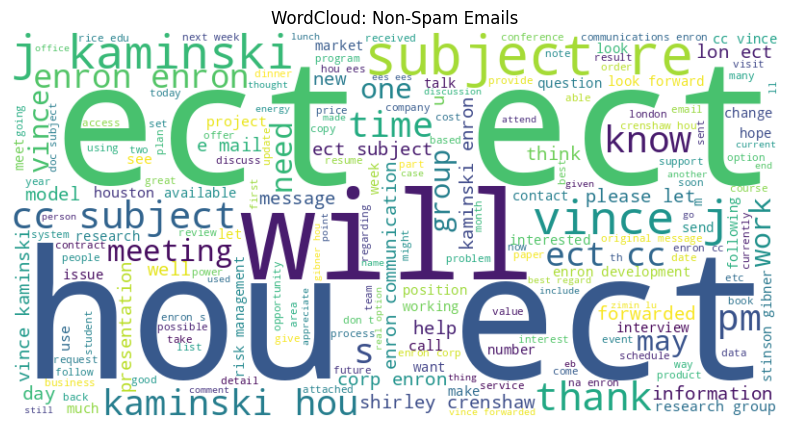

<ipython-input-27-64ce7206c1eb>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


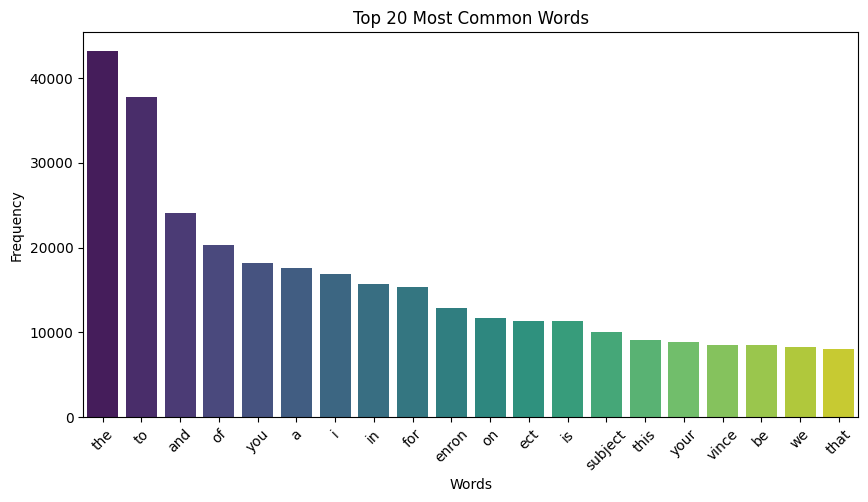

In [27]:
# Visualization 1: Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data['spam'])
plt.title("Class Distribution: Spam vs Legitimate")
plt.xticks([0, 1], ["Not Spam", "Spam"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Visualization 2: Text Length Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data[data['spam'] == 0]['text_length'], bins=30, color='blue', kde=True, label="Not Spam")
sns.histplot(data[data['spam'] == 1]['text_length'], bins=30, color='red', kde=True, label="Spam")
plt.title("Text Length Distribution")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Visualization 3: WordCloud for Spam Emails
spam_words = ' '.join(data[data['spam'] == 1]['cleaned_text'])
spam_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(spam_words)
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title("WordCloud: Spam Emails")
plt.axis("off")
plt.show()

# Visualization 4: WordCloud for Non-Spam Emails
not_spam_words = ' '.join(data[data['spam'] == 0]['cleaned_text'])
not_spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(not_spam_words)
plt.figure(figsize=(10, 5))
plt.imshow(not_spam_wordcloud, interpolation='bilinear')
plt.title("WordCloud: Non-Spam Emails")
plt.axis("off")
plt.show()

# Visualization 5: Top 20 Most Common Words
all_words = ' '.join(data['cleaned_text'])
word_freq = Counter(all_words.split())
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title("Top 20 Most Common Words")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

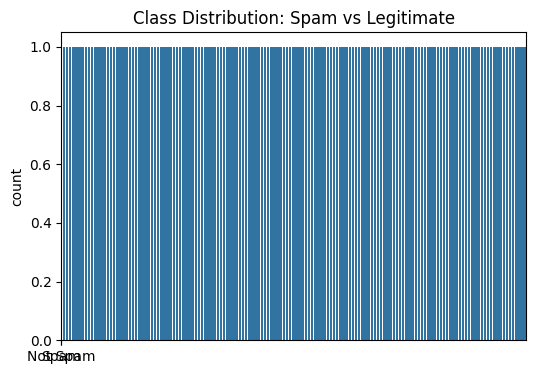

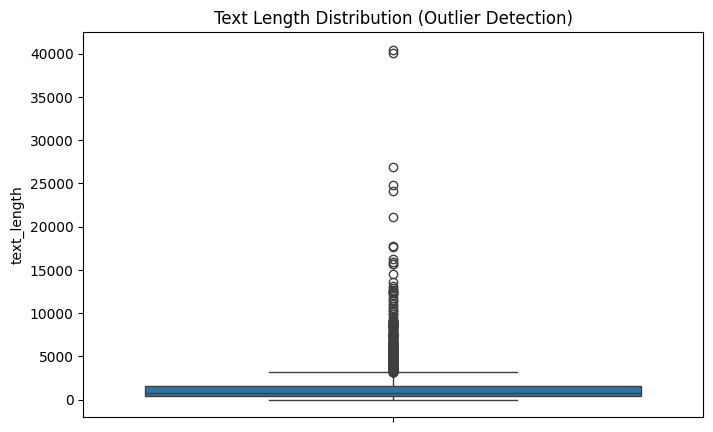

In [19]:
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data['spam'])
plt.title("Class Distribution: Spam vs Legitimate")
plt.xticks([0, 1], ["Not Spam", "Spam"])
plt.show()

# Outlier Detection (Text Length Analysis)
data['text_length'] = data['cleaned_text'].apply(len)
plt.figure(figsize=(8, 5))
sns.boxplot(data['text_length'])
plt.title("Text Length Distribution (Outlier Detection)")
plt.show()

# Remove outliers: Texts with extremely high length
threshold = data['text_length'].quantile(0.99)  # Top 1% of lengths
data = data[data['text_length'] <= threshold]

In [20]:
# Splitting the data
X = data['cleaned_text']
y = data['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizing the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [21]:
# Model 1: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_predictions = rf_model.predict(X_test_tfidf)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Model 2: Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_predictions = nb_model.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_predictions)


In [22]:
# Display results
print("\nRandom Forest Classifier Results:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(classification_report(y_test, rf_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

print("\nMultinomial Naive Bayes Results:")
print(f"Accuracy: {nb_accuracy:.2f}")
print(classification_report(y_test, nb_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, nb_predictions))

# Compare models
best_model = "Random Forest" if rf_accuracy > nb_accuracy else "Multinomial Naive Bayes"
print(f"\nBest Model: {best_model}")


Random Forest Classifier Results:
Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       840
           1       0.99      0.93      0.96       294

    accuracy                           0.98      1134
   macro avg       0.98      0.96      0.97      1134
weighted avg       0.98      0.98      0.98      1134

Confusion Matrix:
[[838   2]
 [ 22 272]]

Multinomial Naive Bayes Results:
Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       840
           1       0.99      0.90      0.95       294

    accuracy                           0.97      1134
   macro avg       0.98      0.95      0.96      1134
weighted avg       0.97      0.97      0.97      1134

Confusion Matrix:
[[838   2]
 [ 28 266]]

Best Model: Random Forest


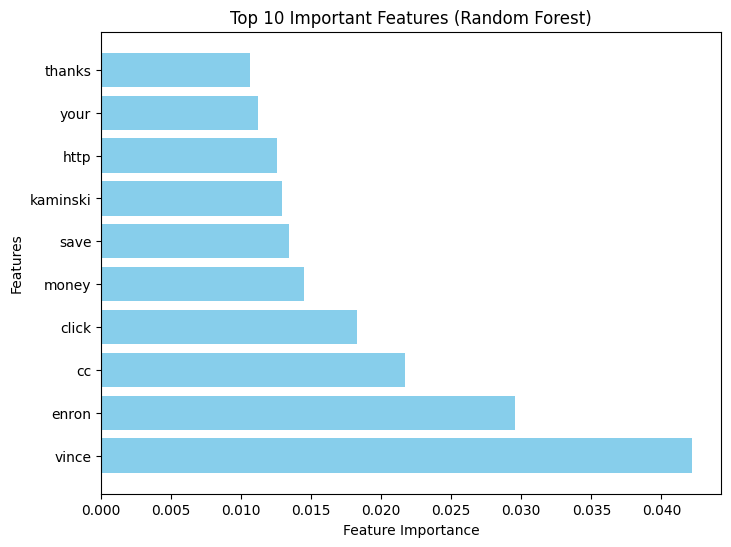

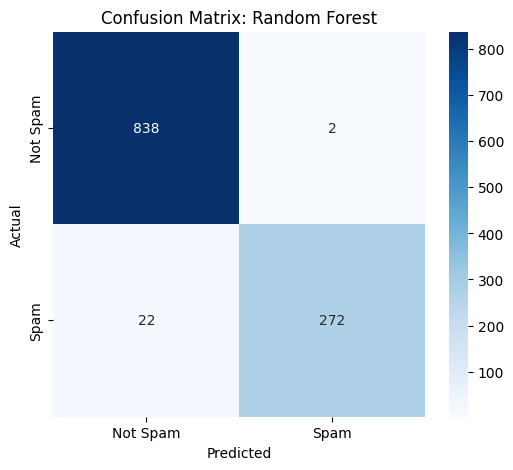

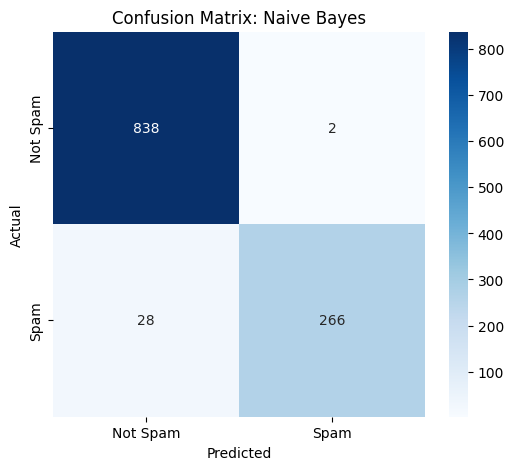


Best Model: Random Forest


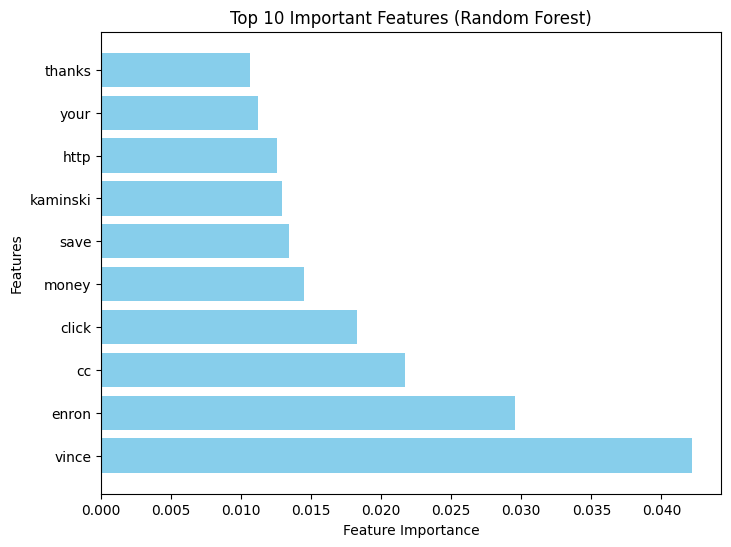

In [23]:
# Feature Importance Visualization (for Random Forest)
feature_importance = rf_model.feature_importances_
indices = feature_importance.argsort()[-10:][::-1]
top_features = [vectorizer.get_feature_names_out()[i] for i in indices]

plt.figure(figsize=(8, 6))
plt.barh(top_features, feature_importance[indices], color="skyblue")
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()# Confusion Matrix Visualization
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(y_test, rf_predictions, "Confusion Matrix: Random Forest")
plot_confusion_matrix(y_test, nb_predictions, "Confusion Matrix: Naive Bayes")

# Compare models
best_model = "Random Forest" if rf_accuracy > nb_accuracy else "Multinomial Naive Bayes"
print(f"\nBest Model: {best_model}")

# Feature Importance Visualization (for Random Forest)
feature_importance = rf_model.feature_importances_
indices = feature_importance.argsort()[-10:][::-1]
top_features = [vectorizer.get_feature_names_out()[i] for i in indices]

plt.figure(figsize=(8, 6))
plt.barh(top_features, feature_importance[indices], color="skyblue")
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()


Training Random Forest...
Random Forest Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       840
           1       0.99      0.93      0.96       294

    accuracy                           0.98      1134
   macro avg       0.98      0.96      0.97      1134
weighted avg       0.98      0.98      0.98      1134



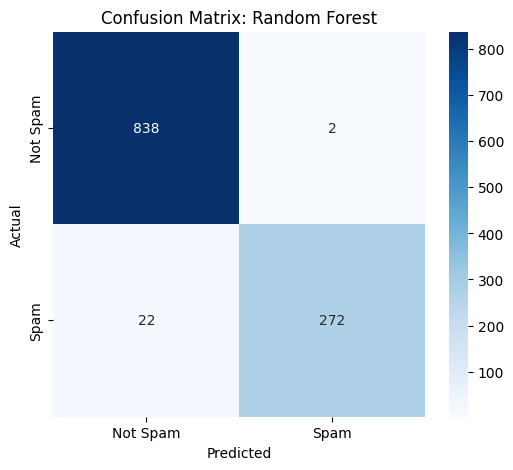


Training Naive Bayes...
Naive Bayes Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       840
           1       0.99      0.90      0.95       294

    accuracy                           0.97      1134
   macro avg       0.98      0.95      0.96      1134
weighted avg       0.97      0.97      0.97      1134



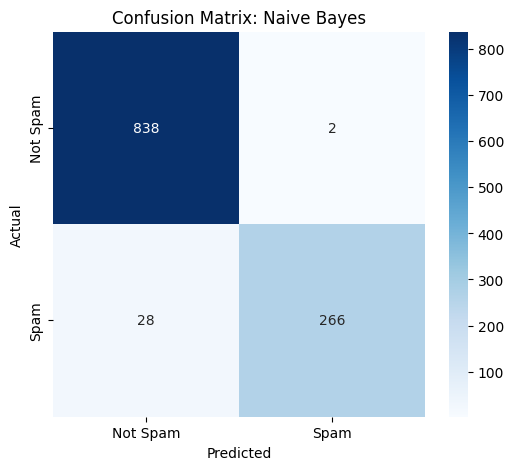


Training Logistic Regression...
Logistic Regression Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       840
           1       0.99      0.94      0.96       294

    accuracy                           0.98      1134
   macro avg       0.98      0.97      0.97      1134
weighted avg       0.98      0.98      0.98      1134



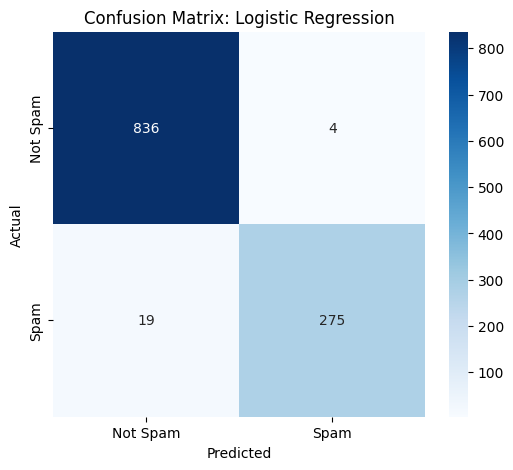


Training SVM...
SVM Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       840
           1       0.99      0.99      0.99       294

    accuracy                           1.00      1134
   macro avg       0.99      0.99      0.99      1134
weighted avg       1.00      1.00      1.00      1134



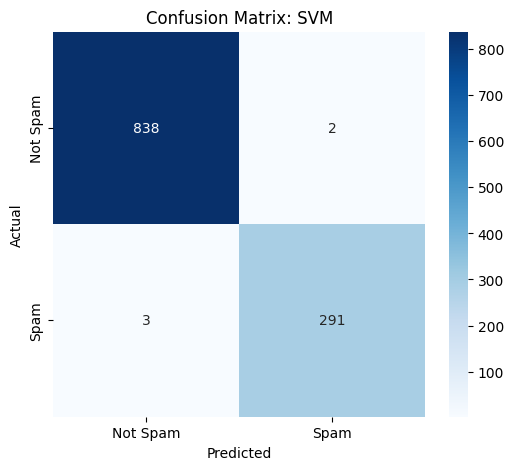


Training Gradient Boosting...
Gradient Boosting Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       840
           1       0.96      0.90      0.93       294

    accuracy                           0.96      1134
   macro avg       0.96      0.94      0.95      1134
weighted avg       0.96      0.96      0.96      1134



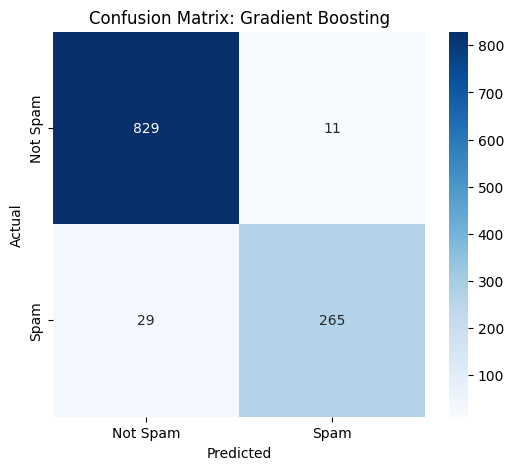


Model Performance Summary:
Random Forest: 0.98
Naive Bayes: 0.97
Logistic Regression: 0.98
SVM: 1.00
Gradient Boosting: 0.96


<ipython-input-25-a070a25425fb>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


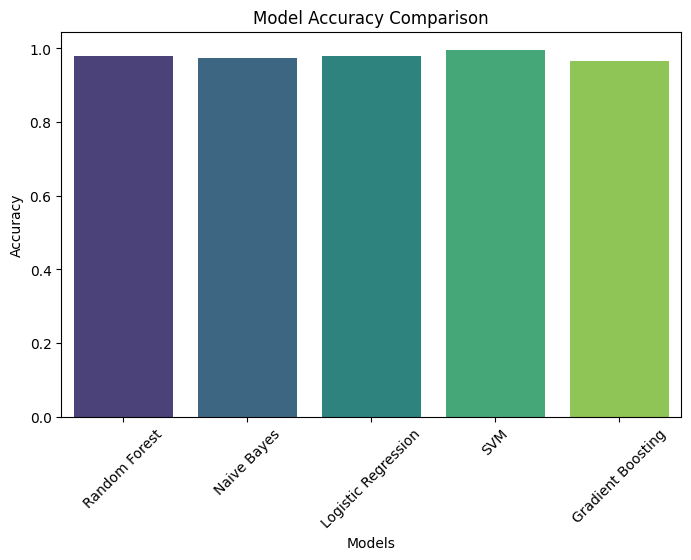

In [25]:
# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
}

# Training and evaluating models
results = {}
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train_tfidf, y_train)
    predictions = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, predictions)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, predictions))

    # Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
    plt.title(f"Confusion Matrix: {model_name}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Compare results
print("\nModel Performance Summary:")
for model, acc in results.items():
    print(f"{model}: {acc:.2f}")

# Plot model accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.show()